In [4]:
# import itertools
import os
import sys
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io

from collections import defaultdict
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import re
import h5py
import napari
import tifffile as tiff
import seaborn as sns
import pickle

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
p_dir = (Path().cwd().parents[0]).absolute()

module_path = str(p_dir / "src")
 
if module_path not in sys.path:
    sys.path.append(module_path)

# Plot 

In [12]:
# Columns name
columns = ['CREB', 'JNK', 'NFKB', 'P38', 'ERK','AKT','S6K','STAT3','STAT5']

# Data
data = [[68, 57.5, 72, 81, 140, 102.5, 71, 80.5, 81],
[173.5, 80, 100.5, 163, 1132, 377.5, 114, 190, 113.5],
[125, 73,74,89,	151, 120, 63, 106.5, 73],
[183, 67, 70, 178.5, 202.5, 211.5, 71, 172, 92]]

# DataFrame
df = pd.DataFrame(data, columns=columns)
df['Condition'] = ['Control', 'Control', 'Treated', 'Treated']
df = df.groupby(['Condition']).sum().reset_index()

df_melt = df.melt(id_vars=['Condition'], var_name=['Marker'], value_name='Event Count')

In [13]:
df.groupby(['Condition']).sum()

,CREB,JNK,NFKB,P38,ERK,AKT,S6K,STAT3,STAT5
Condition,,,,,,,,,
Control,241.5,137.5,172.5,244.0,1272.0,480.0,185,270.5,194.5
Treated,308.0,140.0,144.0,267.5,353.5,331.5,134,278.5,165.0


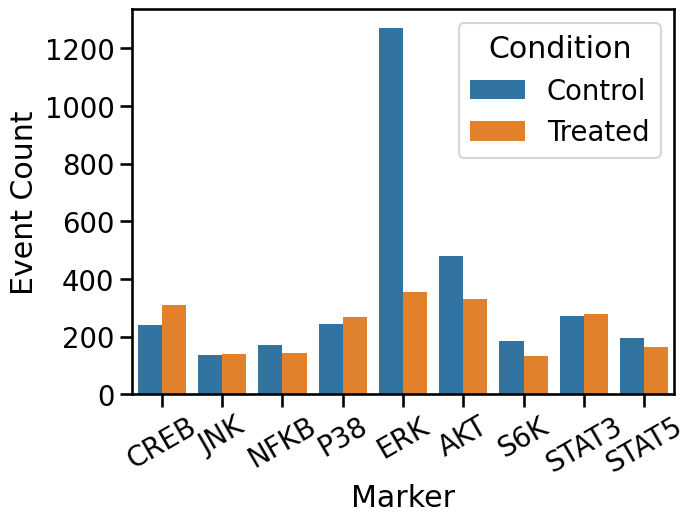

In [14]:

with sns.plotting_context('talk', font_scale=1.2):
    fig, axs = plt.subplots(figsize=(7,5))
    ax = sns.barplot(data=df_melt, x='Marker', y='Event Count', hue='Condition')
    ax.tick_params(axis='x', rotation=30)
    